## Employment Level - Agriculture and Related Industries

The author(s) of the project: **Yerassyl Mukhamediyar**

**Necessary imports**

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

**Each step below can be performed separately** (with exception of step 7)

**Step1.** *Take any time series of monthly or quarterly periodicity with seasonal pattern.
Clearly describe the source you use.*

In [51]:
file_name = 'LNU02034560.csv'
data = pd.read_csv(file_name)
data

,observation_date,LNU02034560
0,1948-01-01,6846
1,1948-02-01,6587
2,1948-03-01,6677
3,1948-04-01,7222
4,1948-05-01,7556
...,...,...
918,2024-07-01,2421
919,2024-08-01,2393
920,2024-09-01,2273
921,2024-10-01,2330


**Description**

This data series is part of the **Current Population Survey (Household Survey)** conducted by the U.S. Bureau of Labor Statistics. It provides **monthly** employment statistics specific to Agriculture and Related Industries, **unadjusted for the seasonal differences**.

**Source:**  
U.S. Bureau of Labor Statistics, *Employment Level - Agriculture and Related Industries* [LNU02034560], retrieved from FRED, Federal Reserve Bank of St. Louis; [https://fred.stlouisfed.org/series/LNU02034560](https://fred.stlouisfed.org/series/LNU02034560), January 3, 2025.


**Step 2.** *Visualize the time series. Try to use different plot types. Split your time series into train and test parts.*

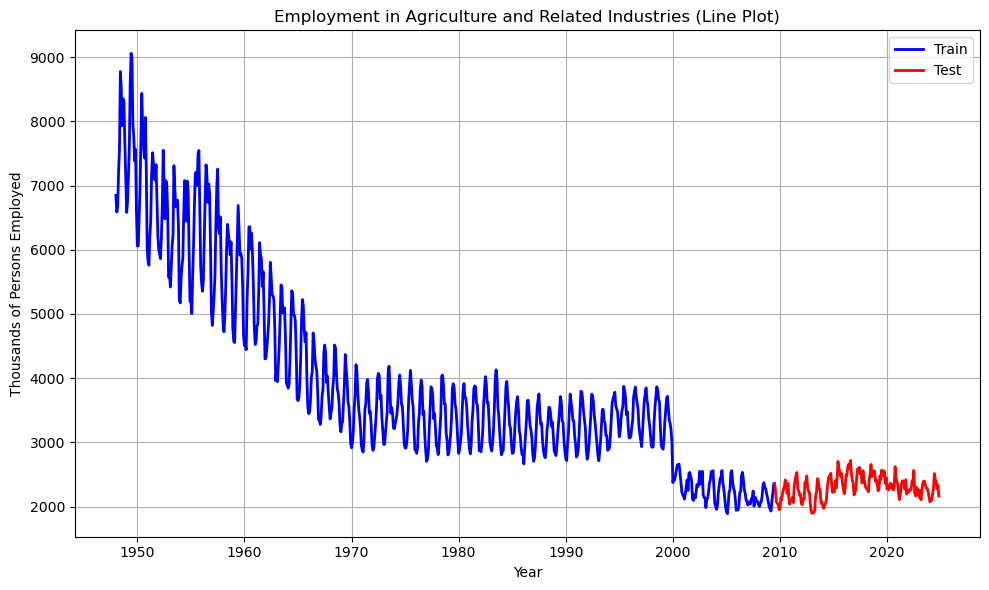

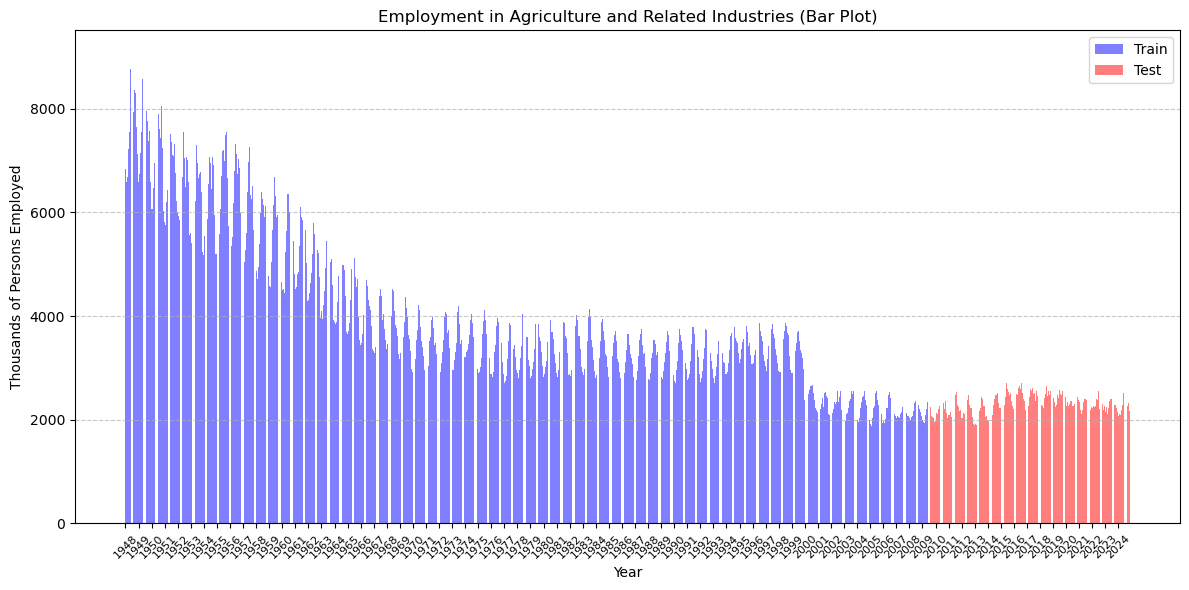

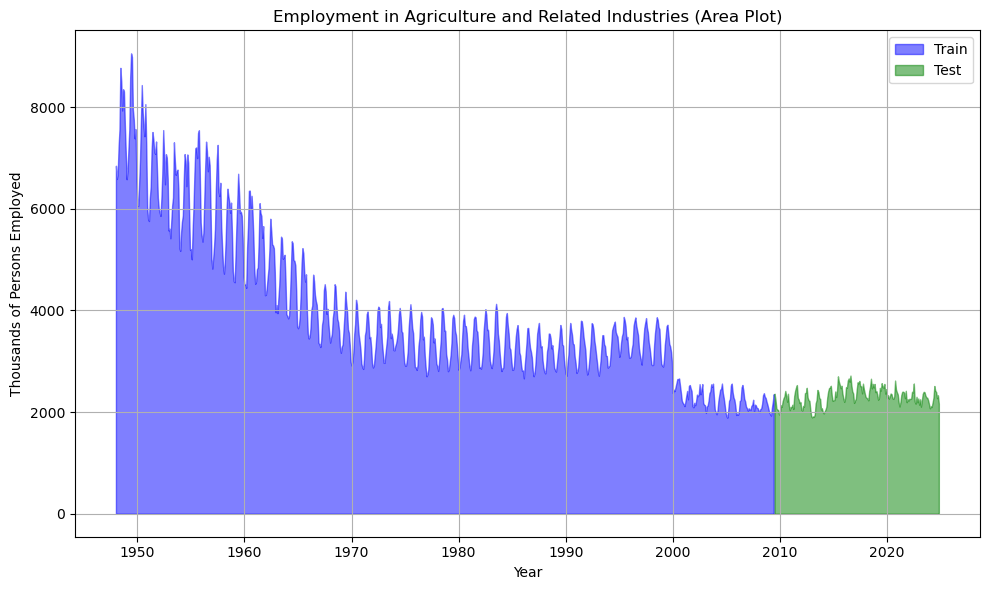

In [145]:
file_name = 'LNU02034560.csv'  # Specify the CSV file name

df = pd.read_csv(file_name)  # Load the CSV file into a DataFrame
df.rename(columns={'observation_date': 'Date', 'LNU02034560': 'Value'}, inplace=True)  # Rename columns for clarity

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df.sort_values(by='Date', inplace=True)  # Sort the DataFrame by the 'Date' column
df.set_index('Date', inplace=True)  # Set the 'Date' column as the DataFrame index

train_size = 0.8  # Define the fraction of data used for training
train, test = train_test_split(df, train_size=train_size, shuffle=False)  # Split the data into train and test sets

#LINE PLOT!

plt.figure(figsize=(10, 6))  # Create a new figure with specified size
plt.plot(train.index, train['Value'], label='Train', color='blue', linewidth=2)  # Plot training data
plt.plot(test.index, test['Value'], label='Test', color='red', linewidth=2)  # Plot testing data
plt.title('Employment in Agriculture and Related Industries (Line Plot)')  # Set the plot title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Thousands of Persons Employed')  # Label the y-axis
plt.legend()  # Show the legend
plt.grid()  # Enable grid lines
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

plt.figure(figsize=(12, 6))  # Create a new figure with specified size
train_indices = range(len(train))  # Generate sequential indices for training data
test_indices = range(len(train), len(train) + len(test))  # Generate sequential indices for testing data

#BAR PLOT!

plt.bar(train_indices, train['Value'], label='Train', color='blue', alpha=0.5, width=0.8)  # Plot training bars
plt.bar(test_indices, test['Value'], label='Test', color='red', alpha=0.5, width=0.8)  # Plot testing bars

all_indices = list(train_indices) + list(test_indices)  # Combine all indices
all_dates = list(train.index) + list(test.index)  # Combine all dates
# Slice to remove the last three characters from each x-axis label
plt.xticks(all_indices[::12], [date.strftime('%Y-%m')[:-3] for date in all_dates[::12]], rotation=45, fontsize=8)  # Set x-axis ticks

plt.title('Employment in Agriculture and Related Industries (Bar Plot)')  # Set the plot title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Thousands of Persons Employed')  # Label the y-axis
plt.legend()  # Show the legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Enable grid lines on y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

#AREA PLOT

plt.figure(figsize=(10, 6))  # Create a new figure with specified size
plt.fill_between(train.index, train['Value'], label='Train', color='blue', alpha=0.5)  # Fill area for training data
plt.fill_between(test.index, test['Value'], label='Test', color='green', alpha=0.5)  # Fill area for testing data
plt.title('Employment in Agriculture and Related Industries (Area Plot)')  # Set the plot title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Thousands of Persons Employed')  # Label the y-axis
plt.legend()  # Show the legend
plt.grid()  # Enable grid lines
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

Here, I did represent the data in 3 forms: line, bar and area plot, coloring the last 20% another color because it is the test set while the former 80% are the train set

**Step 3.** *Decompose the time series into three components (trend, seasonal part, noise) and plot them.
Here you may use ETS model or any other decomposition technique*.

Index(['observation_date', 'LNU02034560'], dtype='object')


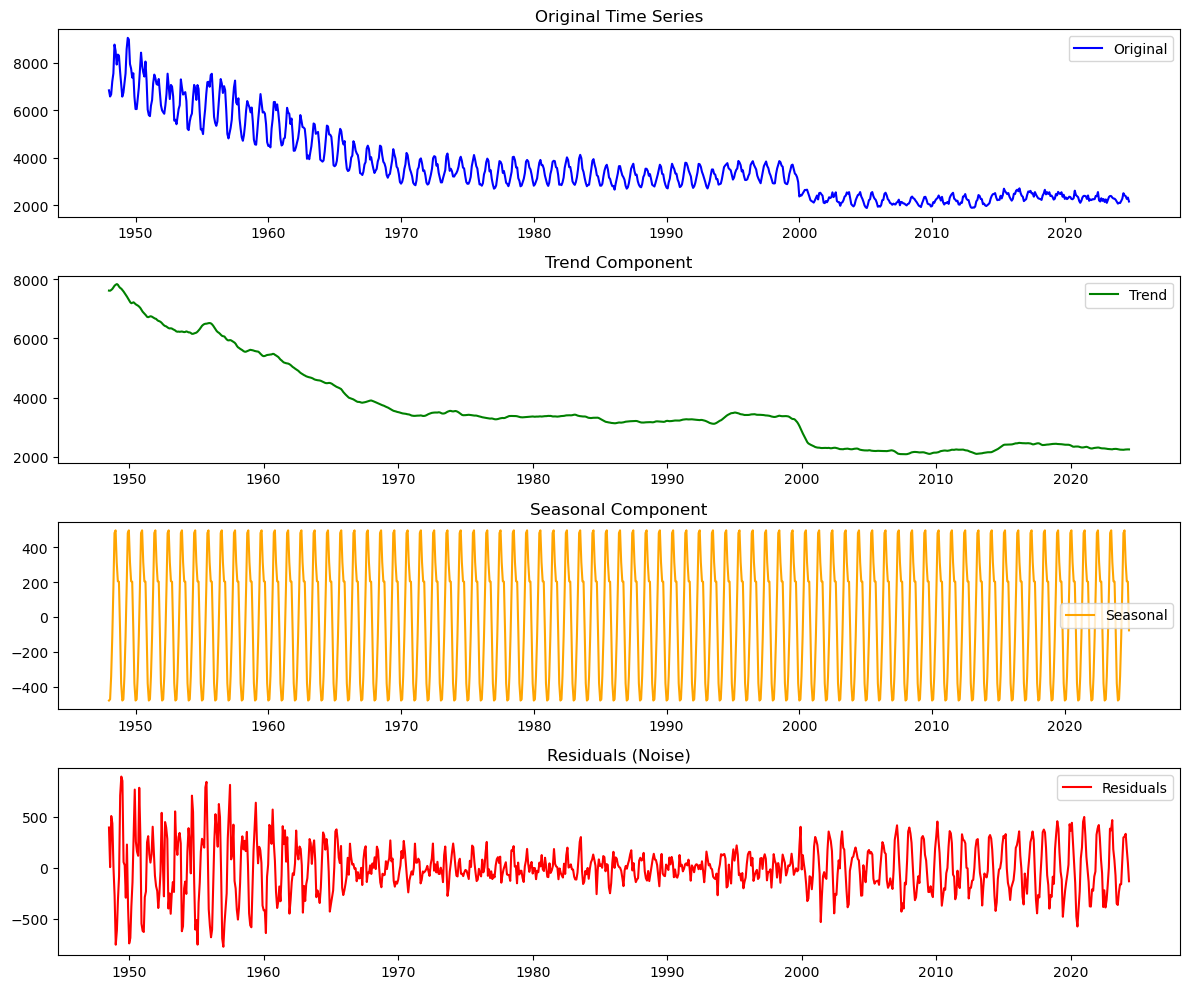

In [147]:
file_name = 'LNU02034560.csv'  # Specify the file name
data = pd.read_csv(file_name)  # Load the data from the CSV file

print(data.columns)  # Display the column names to check them

data.columns = data.columns.str.strip()  # Remove any spaces from column names
data.rename(columns={'observation_date': 'Date', 'LNU02034560': 'Value'}, inplace=True)  # Rename specific columns

data['Date'] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format
data.set_index('Date', inplace=True)  # Set 'Date' as the index for the DataFrame

decomposition = seasonal_decompose(data['Value'], model='additive', period=12)  # Decompose the time series

trend = decomposition.trend  # Extract the trend component
seasonal = decomposition.seasonal  # Extract the seasonal component
residual = decomposition.resid  # Extract the residual component

plt.figure(figsize=(12, 10))  # Create a new figure with specific dimensions

plt.subplot(4, 1, 1)  # Create the first subplot for the original series
plt.plot(data['Value'], label='Original', color='blue')  # Plot the original time series
plt.title('Original Time Series')  # Add a title to the plot
plt.legend()  # Add a legend

plt.subplot(4, 1, 2)  # Create the second subplot for the trend
plt.plot(trend, label='Trend', color='green')  # Plot the trend component
plt.title('Trend Component')  # Add a title to the plot
plt.legend()  # Add a legend

plt.subplot(4, 1, 3)  # Create the third subplot for the seasonal component
plt.plot(seasonal, label='Seasonal', color='orange')  # Plot the seasonal component
plt.title('Seasonal Component')  # Add a title to the plot
plt.legend()  # Add a legend

plt.subplot(4, 1, 4)  # Create the fourth subplot for the residuals
plt.plot(residual, label='Residuals', color='red')  # Plot the residual component
plt.title('Residuals (Noise)')  # Add a title to the plot
plt.legend()  # Add a legend

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

Here is a decomposition into trend, seasonal componenet and noise

**Step 4.** *Make forecasts using Random Forest or Gradient Boosting.
Clearly describe the features you create. You may use any additional predictors* 

**Feature description**

**Lag_1, Lag_2, Lag_3:**  
These are the values of the employment level from the previous one, two, and three time steps, respectively. Chosen to capture autocorrelation, meaning past values can provide significant predictive power for future values.

**Rolling_Mean_3:**  
The 3-period moving average of the employment level. Smooths out short-term fluctuations to capture the overall trend over the past three months, making it useful for trend prediction.

**Rolling_Std_3:**  
The 3-period rolling standard deviation of the employment level. Captures the variability in the series over the last three months. Periods of higher variability could indicate economic instability or seasonality, which might influence predictions.

**Month:**  
The month of the observation (1 for January, 2 for February, etc.). Accounts for seasonality in the data. For example, employment in agriculture might increase during planting or harvesting seasons.

**Year:**  
The year of the observation. Captures long-term trends or structural changes over time, such as economic growth or policy shifts impacting employment.

**Seasonality_Sin:**  
A sine transformation of the month to represent periodic patterns. Converts the cyclic nature of months into a continuous wave that models seasonality mathematically.

**Seasonality_Cos:**  
A cosine transformation of the month to complement the sine wave. Works alongside Seasonality_Sin to fully represent the periodic nature of the data, ensuring that the model can capture cyclic patterns effectively.


**Random forest**

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 68.25313223024371


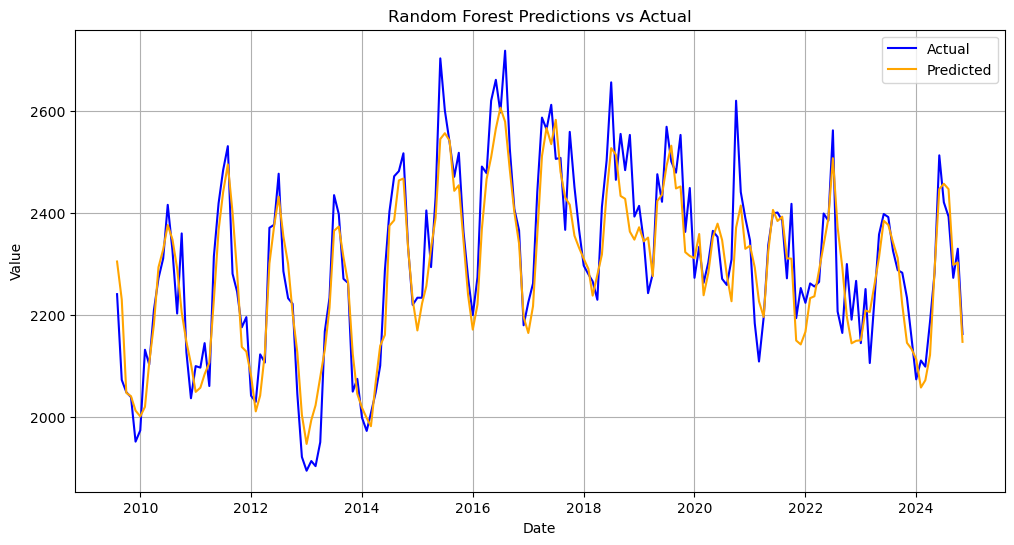

In [392]:
file_name = 'LNU02034560.csv'
data = pd.read_csv(file_name)  # Load the dataset

data.rename(columns={'observation_date': 'Date', 'LNU02034560': 'Value'}, inplace=True)  # Rename columns
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime format
data.set_index('Date', inplace=True)  # Set 'Date' as the index

data['Lag_1'] = data['Value'].shift(1)  # Add lag feature for t-1
data['Lag_2'] = data['Value'].shift(2)  # Add lag feature for t-2
data['Lag_3'] = data['Value'].shift(3)  # Add lag feature for t-3
data['Rolling_Mean_3'] = data['Value'].rolling(window=3).mean()  # Compute 3-month rolling mean
data['Rolling_Std_3'] = data['Value'].rolling(window=3).std()  # Compute 3-month rolling std
data['Month'] = data.index.month  # Extract month as a categorical feature
data['Year'] = data.index.year  # Extract year as a feature
data['Seasonality_Sin'] = np.sin(2 * np.pi * data.index.month / 12)  # Compute sine wave for seasonality
data['Seasonality_Cos'] = np.cos(2 * np.pi * data.index.month / 12)  # Compute cosine wave for seasonality

data.dropna(inplace=True)  # Drop rows with missing values created by lagging/rolling

X = data[['Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3', 'Rolling_Std_3', 'Month', 'Year', 'Seasonality_Sin', 'Seasonality_Cos']]  # Select features
y = data['Value']  # Select target variable

train_size = 0.8  # Set training size ratio
split_index = int(len(data) * train_size)  # Calculate split index
X_train, X_test = X[:split_index], X[split_index:]  # Split features into training and testing sets
y_train, y_test = y[:split_index], y[split_index:]  # Split target into training and testing sets

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize Random Forest model
rf_model.fit(X_train, y_train)  # Train the model on training data

y_pred_train = rf_model.predict(X_train)  # Predict on training data
y_pred_test = rf_model.predict(X_test)  # Predict on testing data

RMSE_for_random_forest = mean_squared_error(y_test, y_pred_test, squared = False)

print("Test RMSE:", RMSE_for_random_forest)  # Compute RMSE for testing data

plt.figure(figsize=(12, 6))  # Create a figure
plt.plot(y_test.index, y_test, label='Actual', color='blue')  # Plot actual values
plt.plot(y_test.index, y_pred_test, label='Predicted', color='orange')  # Plot predicted values
plt.title('Random Forest Predictions vs Actual')  # Add title
plt.xlabel('Date')  # Add x-axis label
plt.ylabel('Value')  # Add y-axis label
plt.legend()  # Add legend
plt.grid()  # Add grid
plt.show()  # Display the plot


Here is how close the prediction followed actual set

**Gradient boosting** (The distinction between the everyday use of "or" and the logical "or" operator led me to interpret "or" as the logical operator. As a result, I implemented both Random Forest and Gradient Boosting.)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 73.75392342061858


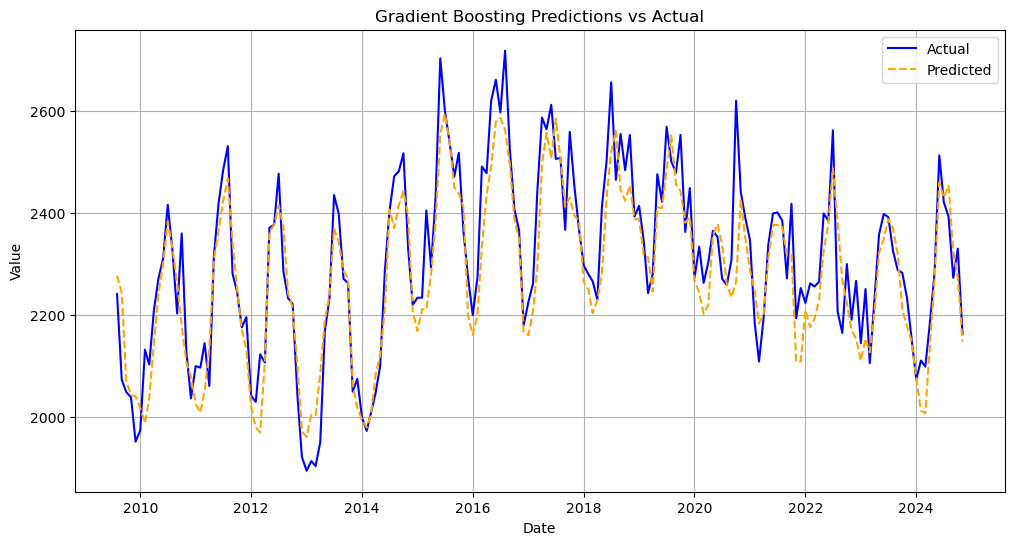

In [366]:
file_name = 'LNU02034560.csv'
df = pd.read_csv(file_name)  # Load the dataset

df.rename(columns={'observation_date': 'Date', 'LNU02034560': 'Value'}, inplace=True)  # Rename columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df.sort_values(by='Date', inplace=True)  # Sort data by 'Date'
df.set_index('Date', inplace=True)  # Set 'Date' as the index

df['Lag_1'] = df['Value'].shift(1)  # Create lagged feature for t-1
df['Lag_2'] = df['Value'].shift(2)  # Create lagged feature for t-2
df['Lag_3'] = df['Value'].shift(3)  # Create lagged feature for t-3
df['Rolling_Mean_3'] = df['Value'].rolling(window=3).mean()  # Compute 3-month rolling mean
df['Rolling_Std_3'] = df['Value'].rolling(window=3).std()  # Compute 3-month rolling standard deviation
df['Month'] = df.index.month  # Extract month as a feature
df['Year'] = df.index.year  # Extract year as a feature
df['Seasonality_Sin'] = np.sin(2 * np.pi * df.index.month / 12)  # Add sine transformation for seasonality
df['Seasonality_Cos'] = np.cos(2 * np.pi * df.index.month / 12)  # Add cosine transformation for seasonality

df.dropna(inplace=True)  # Drop rows with missing values

X = df[['Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3', 'Rolling_Std_3', 'Month', 'Year', 'Seasonality_Sin', 'Seasonality_Cos']]  # Select features
y = df['Value']  # Select target variable

train_size = 0.8  # Define the training size ratio
split_index = int(len(df) * train_size)  # Calculate the split index
X_train, X_test = X[:split_index], X[split_index:]  # Split features into training and testing sets
y_train, y_test = y[:split_index], y[split_index:]  # Split target into training and testing sets

gb_model = HistGradientBoostingRegressor(random_state=42)  # Initialize Gradient Boosting model
gb_model.fit(X_train, y_train)  # Train the model on training data

y_pred_train = gb_model.predict(X_train)  # Predict on training data
y_pred_test = gb_model.predict(X_test)  # Predict on testing data

RMSE_for_gradient_boosting = mean_squared_error(y_test, y_pred_test, squared = False)

print("Test RMSE:", RMSE_for_gradient_boosting)  # Compute RMSE for testing data

plt.figure(figsize=(12, 6))  # Create a figure for plotting
plt.plot(y_test.index, y_test, label='Actual', color='blue')  # Plot actual values
plt.plot(y_test.index, y_pred_test, label='Predicted', color='orange', linestyle='--')  # Plot predicted values
plt.title('Gradient Boosting Predictions vs Actual')  # Add a title to the plot
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Value')  # Label the y-axis
plt.legend()  # Add a legend
plt.grid()  # Add a grid
plt.show()  # Display the plot


Here is how closely prediction followed actual test set

**Step 5.** *Make forecasts using appropriate model of ETS class*

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 202.77950403450063


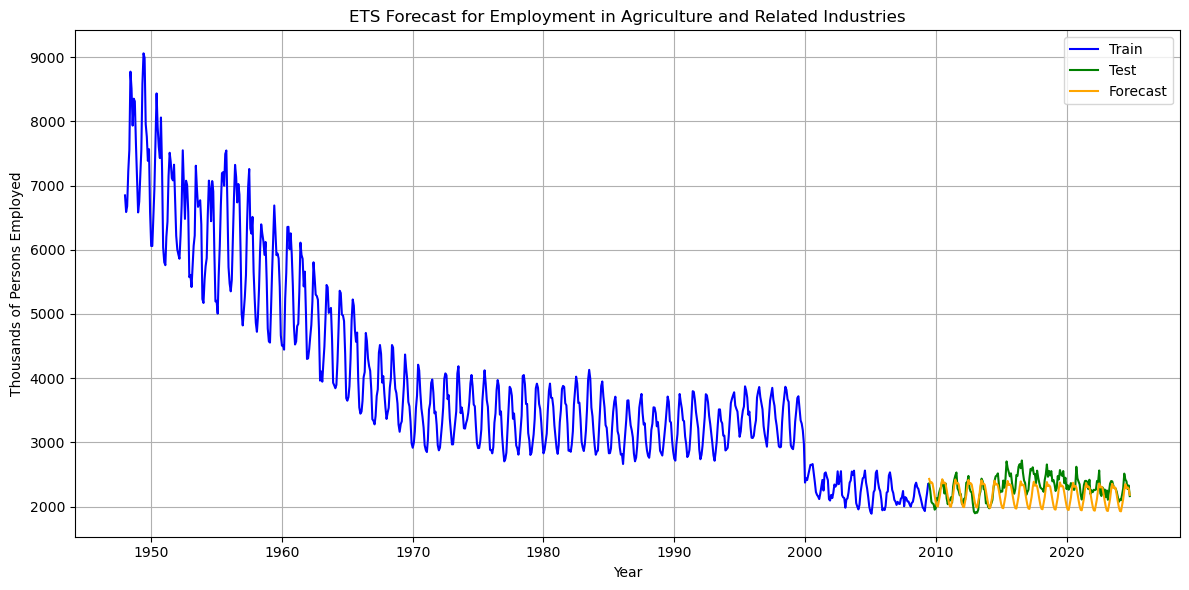

In [358]:
file_name = 'LNU02034560.csv'
df = pd.read_csv(file_name)  # Load the dataset

df.rename(columns={'observation_date': 'Date', 'LNU02034560': 'Value'}, inplace=True)  # Rename columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df.set_index('Date', inplace=True)  # Set 'Date' as the index

train_size = 0.8  # Define the training set size
split_index = int(len(df) * train_size)  # Calculate the split index
train = df[:split_index]  # Split the data into training set
test = df[split_index:]  # Split the data into testing set

ets_model = ExponentialSmoothing(
    train['Value'], 
    trend='additive', 
    seasonal='additive', 
    seasonal_periods=12
).fit()  # Fit an ETS model with additive trend and seasonality

forecast = ets_model.forecast(steps=len(test))  # Forecast future values for the test set

RMSE_for_ETS = mean_squared_error(test['Value'], forecast, squared=False)
print("Test RMSE:", RMSE_for_ETS)

plt.figure(figsize=(12, 6))  # Create a plot figure
plt.plot(train.index, train['Value'], label='Train', color='blue')  # Plot training data
plt.plot(test.index, test['Value'], label='Test', color='green')  # Plot testing data
plt.plot(test.index, forecast, label='Forecast', color='orange')  # Plot forecasted values
plt.title('ETS Forecast for Employment in Agriculture and Related Industries')  # Add a title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Thousands of Persons Employed')  # Label the y-axis
plt.legend()  # Add a legend
plt.grid()  # Add a grid
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot



**Step 6.** *Surprise me part! Make forecasts using any statistical model or machine learning algorithm of your choice. Try to be creative!*

# My Model  
*(It's computationally heavy. You have to wait)*  

Here’s a step-by-step explanation of the prediction algorithm described earlier:

## **Step 1: Fitting the SARIMA Model**  
- Fit a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model to the training data.  
- Capture trend, seasonality, and noise components using appropriate parameters.  

## **Step 2: Feature Engineering Lags with Lasso Regression**  
- Generate lagged values of the residuals (e.g., values from 1 month ago, 2 months ago, etc.) to capture temporal dependencies.  
- Create up to 12 lags (one for each previous month in a year).  
- Drop rows with missing values caused by lagging.  
- Standardize lagged features to have a mean of 0 and a standard deviation of 1.  
- Use Lasso regression to select the most significant lagged features for prediction.  

## **Step 3: Monte Carlo Simulation for Stochastic Forecasting**  
- Use the SARIMA model to produce a deterministic forecast (mean predictions) for the test period.  
- Perform Monte Carlo simulations by:  
  - Adding random noise sampled from the residuals to the deterministic forecast.  
  - Repeating this process 100 times to generate a distribution of possible forecasted values.  

## **Step 4: Taking the Average of Simulated Paths**  
- Aggregate the simulated forecasts to calculate:  
  - The mean forecast as the final prediction.  
  - Confidence intervals (e.g., 90%) to quantify uncertainty.  
ures robust forecasting by accounting for both deterministic and random components in the data.

C:\Users\user\AppData\Local\Temp\ipykernel_6676\2330999971.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Residuals'] = sarima_model.resid  # Add residuals from the SARIMA model to the training set


Selected Lags: Index(['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8',
       'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 433.35674075436606


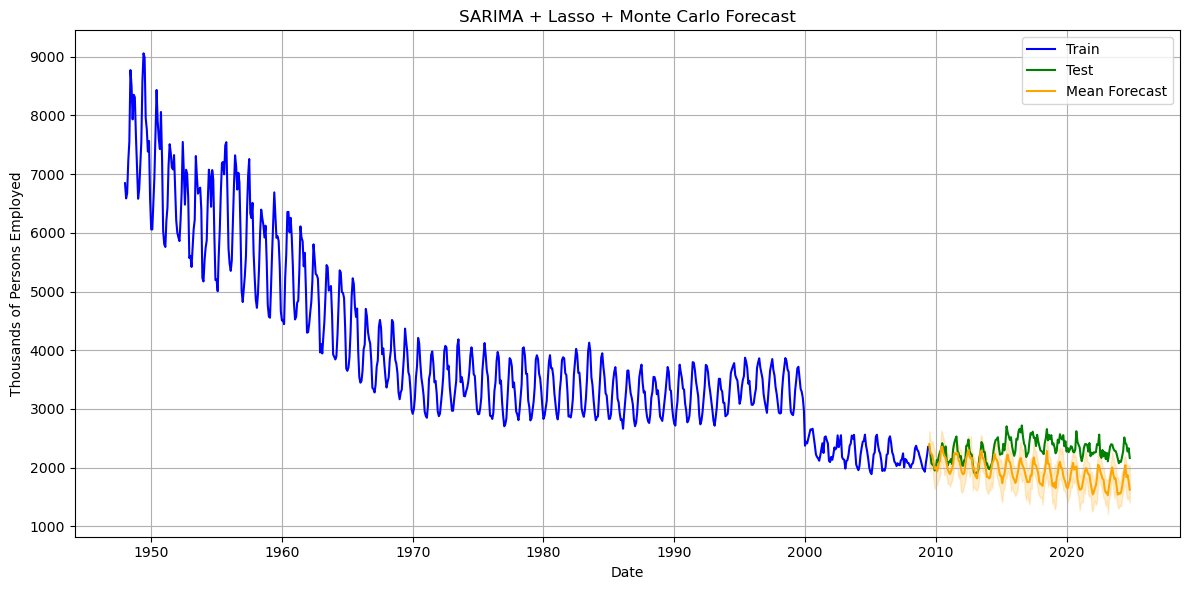

In [362]:
file_name = 'LNU02034560.csv'
df = pd.read_csv(file_name)  # Load the dataset
df.rename(columns={'observation_date': 'Date', 'LNU02034560': 'Value'}, inplace=True)  # Rename columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set 'Date' as the index
df = df.asfreq('MS')  # Set the frequency to monthly start

train_size = 0.8  # Define the train-test split ratio
split_index = int(len(df) * train_size)  # Calculate the split index
train = df[:split_index]  # Split data into training set
test = df[split_index:]  # Split data into testing set

sarima_model = SARIMAX(
    train['Value'],
    order=(2, 1, 2),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
).fit()  # Fit a SARIMA model

train.loc[:, 'Residuals'] = sarima_model.resid  # Add residuals from the SARIMA model to the training set

max_lags = 12  # Set the maximum number of lags for feature creation
lagged_features = pd.concat([train['Residuals'].shift(i) for i in range(1, max_lags + 1)], axis=1)  # Create lagged features
lagged_features.columns = [f'Lag_{i}' for i in range(1, max_lags + 1)]  # Name the lagged columns
lagged_features['Target'] = train['Residuals']  # Add the target column
lagged_features.dropna(inplace=True)  # Drop rows with missing values

X = lagged_features.drop('Target', axis=1)  # Extract the features
y = lagged_features['Target']  # Extract the target
scaler = StandardScaler()  # Initialize a scaler for feature scaling
X_scaled = scaler.fit_transform(X)  # Scale the features
lasso = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, random_state=42).fit(X_scaled, y)  # Fit a Lasso model for feature selection
selected_lags = X.columns[lasso.coef_ != 0]  # Identify selected features
print("Selected Lags:", selected_lags)  # Display selected lags

forecast_steps = len(test)  # Define the number of forecast steps
simulations = 100  # Set the number of Monte Carlo simulations
forecast_values = []  # Initialize an empty list for storing forecasts

for _ in range(simulations):  # Perform Monte Carlo simulations
    sarima_forecast = sarima_model.get_forecast(steps=forecast_steps)  # Generate SARIMA forecast
    forecast_mean = sarima_forecast.predicted_mean  # Extract the mean forecast
    noise = np.random.choice(train['Residuals'], size=forecast_steps, replace=True)  # Add stochastic noise
    stochastic_forecast = forecast_mean + noise  # Combine forecast and noise
    forecast_values.append(stochastic_forecast)  # Append the result

forecast_values = pd.DataFrame(forecast_values).T  # Convert forecasts to a DataFrame
forecast_values.index = test.index  # Align the index with the test set
lower_bound = forecast_values.quantile(0.05, axis=1)  # Calculate the lower bound of the confidence interval
upper_bound = forecast_values.quantile(0.95, axis=1)  # Calculate the upper bound of the confidence interval
mean_forecast = forecast_values.mean(axis=1)  # Calculate the mean forecast

RMSE_for_my_test = mean_squared_error(test['Value'], mean_forecast, squared=False)
print("Test RMSE:", RMSE_for_my_test)

plt.figure(figsize=(12, 6))  # Initialize the plot
plt.plot(train.index, train['Value'], label='Train', color='blue')  # Plot the training data
plt.plot(test.index, test['Value'], label='Test', color='green')  # Plot the testing data
plt.plot(test.index, mean_forecast, label='Mean Forecast', color='orange')  # Plot the mean forecast
plt.fill_between(test.index, lower_bound, upper_bound, color='orange', alpha=0.2)  # Add confidence intervals
plt.title('SARIMA + Lasso + Monte Carlo Forecast')  # Add title
plt.xlabel('Date')  # Add x-axis label
plt.ylabel('Thousands of Persons Employed')  # Add y-axis label
plt.legend()  # Add legend
plt.grid()  # Add grid
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

**Step 9.** *Compare the three approaches by the forecast quality on the test set. Choose the best approach.*

In [394]:
table = {
    "RMSE_for_random_forest": [RMSE_for_random_forest],
    "RMSE_for_gradient_boosting": [RMSE_for_gradient_boosting],
    "RMSE_for_my_test": [RMSE_for_my_test],
    "RMSE_for_ETS": [RMSE_for_ETS]
}
df = pd.DataFrame(table)

best_rmse = df.min(axis=1).iloc[0]
best_estimator = df.idxmin(axis=1).iloc[0]

print ("the best esitmator is " + best_estimator)

df


the best esitmator is RMSE_for_random_forest


,RMSE_for_random_forest,RMSE_for_gradient_boosting,RMSE_for_my_test,RMSE_for_ETS
0,68.253132,73.753923,433.356741,202.779504


**Step 10.** *Add some fun to your project! :)*

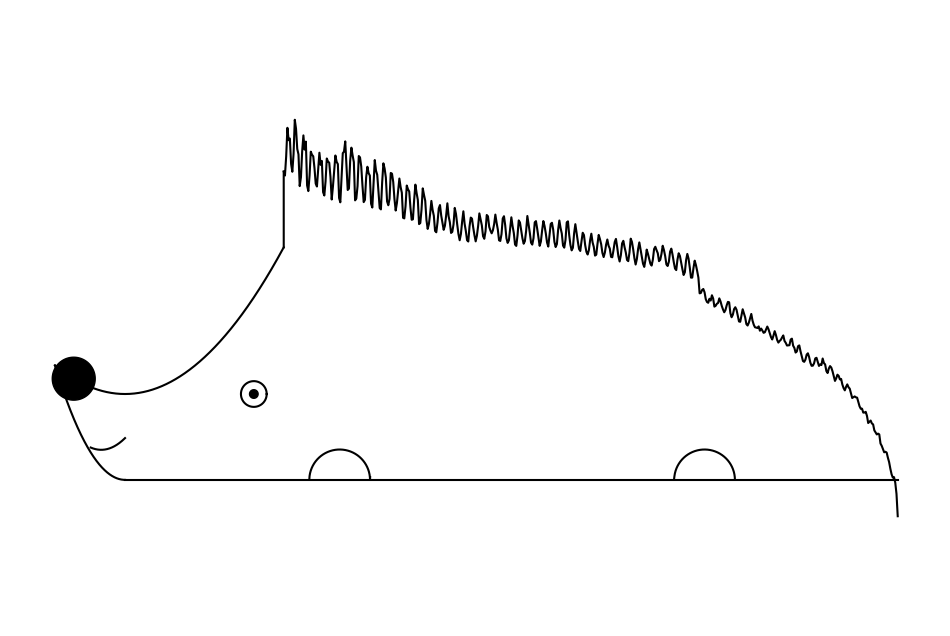

In [308]:
def the_greatest_function_for_the_seasonal_data(data):
    data.rename(columns={'observation_date': 'Date', 'LNU02034560': 'Value'}, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    
    x_min, x_max = -4.3035, 10
    data['x'] = x_min + (x_max - x_min) * (data.index - data.index.min()) / (data.index.max() - data.index.min())
    
    y_min, y_max = data['Value'].min(), data['Value'].max()
    data['y'] = 4 * (data['Value'] - y_min) / (y_max - y_min) - 1
    
    x4_2 = np.linspace(-4.3035, 10, 500)
    y4_2 = np.sqrt(36 * (1 - (x4_2**2 / 100)))
    
    interp_func = interp1d(data['x'], data['y'], kind='linear', fill_value='extrapolate')
    y_interpolated = interp_func(x4_2)
    y_sum = y_interpolated + y4_2
    
    plt.figure(figsize=(12, 8))
    
    plt.plot(x4_2, y_sum, color='black')
    
    x1 = np.linspace(-8, 10, 500)
    y1 = np.zeros_like(x1)
    plt.plot(x1, y1, color='black')
    
    x2 = np.linspace(-3.707, -2.29, 500)
    y2 = np.sqrt(np.abs(0.5 - (x2 + 3)**2))
    plt.plot(x2, y2, color='black')
    
    x3 = np.linspace(4.792, 6.207, 500)
    y3 = np.sqrt(np.abs(0.5 - (x3 - 5.5)**2))
    plt.plot(x3, y3, color='black')
    
    x5 = np.linspace(-9.632, -8, 500)
    y5 = (x5 + 8)**2
    plt.plot(x5, y5, color='black')
    
    center_x, center_y, radius = -5, 2, 0.3
    theta = np.linspace(0, 2 * np.pi, 500)
    circle_x = center_x + radius * np.cos(theta)
    circle_y = center_y + radius * np.sin(theta)
    plt.plot(circle_x, circle_y, color='black')
    
    smaller_radius = 0.1
    smaller_circle_x = center_x + smaller_radius * np.cos(theta)
    smaller_circle_y = center_y + smaller_radius * np.sin(theta)
    plt.fill(smaller_circle_x, smaller_circle_y, color='black')
    
    center_x_1, center_y_1, radius_2 = -9.195, 2.357, 0.5
    circle_x_1 = center_x_1 + radius_2 * np.cos(theta)
    circle_y_1 = center_y_1 + radius_2 * np.sin(theta)
    plt.fill(circle_x_1, circle_y_1, color='black')
    
    x6 = np.linspace(-9.632, -4.303, 500)
    y6 = 0.25 * (x6 + 8)**2 + 2
    plt.plot(x6, y6, color='black')

    x7 = np.linspace(-8.8, -8, 500)
    y7 = 0.02 * (x6 + 8)**2 + 0.7
    plt.plot(x7, y7, color='black')
    
    plt.plot([x6[-1], x4_2[0]], [y6[-1], y_sum[0]], color='black')
    
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Load the dataset and call the function
file_name = 'LNU02034560.csv'
data = pd.read_csv(file_name)
the_holy_grail_of_functions_for_the_seasonal_data(data)


**Behold, the great mathematical wizardry: transforming seasonality into what can only be described as the "hedgehog's back." Ah, yes, those peaks and troughs that rise and fall with such predictable flamboyance, reminiscent of nature's prickliest creature. Who needs smooth, linear forecasts when you can instead showcase a glorious array of spikes that mimic a hedgehog caught in a rhythmic trance?**

Seasonal data, they tell us, is the symphony of time, with each period playing its tune. But alas, the true connoisseurs know the secret—forget harmony; embrace the jagged chaos of dramatic peaks! What better way to impress than by converting mundane patterns into a spiky monstrosity that defies logic yet screams, "Look, I understand seasonality!"

So here’s to the hedgehog: the **unsung hero of time series modeling.** May your spikes forever baffle analysts and delight statisticians who love a little chaos in their charts.





